In [2]:
# 1.
import numpy as np # импортируем все необходимые модули
import matplotlib.pyplot as plt
import pandas as pd
import scipy
#import pd_datareader.data as web
#import datatime as dt
import seaborn as sns
sns.set_context('notebook')
pd.set_option('display.float_format', '{:6.3f}'.format)

In [3]:
# 1а)
n = 1000
a = np.random.randn(n) # генерим массив случайных величин
print(a)

[-5.25230310e-01 -2.46790454e+00  2.43401933e-01 -1.64322294e+00
  7.53098761e-01  1.40685144e+00 -1.21786554e+00 -1.17569152e+00
  6.01228947e-01  1.47233085e+00 -6.46894077e-02  1.47081403e-01
  7.34176449e-01  7.79763052e-01 -1.28181700e-01  8.29535635e-01
  1.73979451e+00  8.57882844e-02 -1.25053227e+00 -8.96803178e-01
  6.78076473e-02 -1.41268357e+00 -7.91793480e-01  1.38490619e-01
  7.14274721e-01  8.14078566e-01 -2.25838671e-02 -1.60980822e+00
 -5.87493287e-02  9.62026215e-01 -1.59711026e+00 -1.13723494e+00
 -1.63019166e-01 -1.17125773e+00  9.36886361e-02  3.79394785e-01
  8.96020151e-01  6.16123767e-01  1.39217042e+00 -1.33872459e-01
 -2.39886796e-01  2.19333752e-01  6.36168784e-01 -6.56140425e-01
 -3.69045677e-01  1.55862764e+00 -1.25263708e+00 -2.31900560e-01
  1.18204926e-01  8.13968139e-01  1.78757546e+00  1.07116233e+00
 -1.45339820e+00  5.59083461e-01 -3.41555667e-01 -6.42265299e-01
  7.08845378e-02  1.27598407e+00 -1.51221852e-01 -8.16841102e-01
  4.65380362e-01 -1.01629

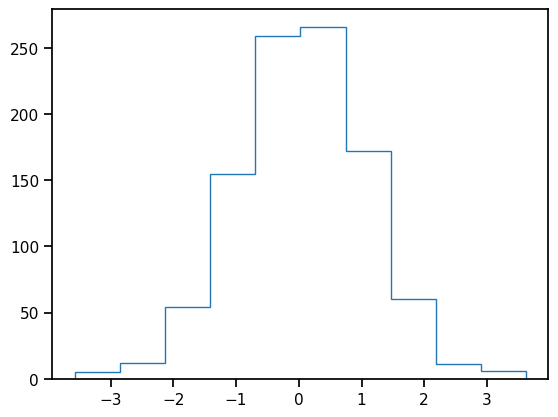

In [4]:
counts, bins = np.histogram(a) # разбиваем массив на "корзины (bins)" и считаем, сколько значений в этих корзинах (counts)

plt.stairs(counts, bins) # выводим "ступенчато", видим визуально, что распределение действительно похоже на нормальное

In [5]:
# 1б)
intervals = [-np.inf, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, np.inf] # задаем интервалы из задания
bins = pd.cut(a, intervals) # разбиваем значения в массиве по указанным интервалам
count = np.unique(bins, return_counts=True)[1] # считаем число значений в каждой "корзине", выводим второй элемент массива (на языке питона первый), чтобы было красиво в числах
print(count)

[ 59  82 137 197 193 170  93  69]


In [6]:
# 1с)
listA = [] # создаем пустой лист
for i in range (0, len(intervals)-1):
    p1 = scipy.stats.norm.cdf(intervals[i+1]) - scipy.stats.norm.cdf(intervals[i]) # выписываем туда значения по формуле, указанной в задании
    listA.append(p1) # добавляем полученное значение вероятности в созданный лист
print(listA) # выводим лист

[0.06680720126885807, 0.091848052662599, 0.1498822847945298, 0.19146246127401312, 0.19146246127401312, 0.1498822847945298, 0.09184805266259899, 0.06680720126885809]


In [7]:
# 1d)
hi2 = 0
number = 0
for i in range (0, len(count)):
    hi2 += ((count[number] - n*listA[number])**2)/(n*listA[number]) # считаем статистику хи-квадрат по заданной формула
    number += 1
print(hi2)

6.034701876237931


In [8]:
# 1.2.
intervals = [-np.inf, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, np.inf] # по большей части копируем то, что происходило выше, при этом зацикливая все на тысяче рандомных массивов (с нормльным распределением)
hihi = []
for i in range(0, 1000):
    a = np.random.randn(n)
    bins = pd.cut(a, intervals)
    count = np.unique(bins, return_counts=True)[1]
    probs = []
    for i in range (0, len(intervals)-1):
        p1 = scipy.stats.norm.cdf(intervals[i+1]) - scipy.stats.norm.cdf(intervals[i])
        probs.append(p1)
    hi2 = 0
    number = 0
    for i in range (0, len(count)):
        hi2 += ((count[number] - n*listA[number])**2)/(n*listA[number])
        number += 1
    hihi.append(hi2) # считаем хи-квадрат для полученных массивов

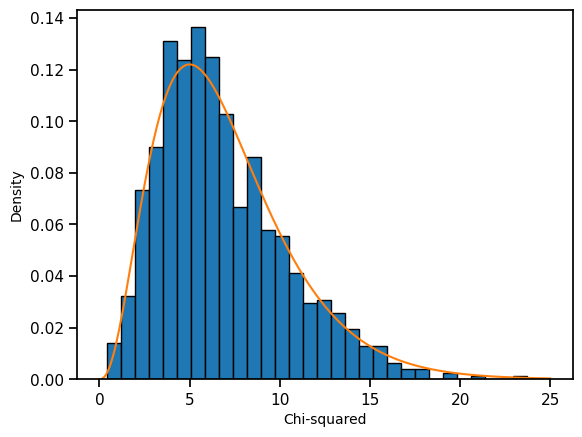

In [9]:
# 1.3.
x = np.linspace(0, 25, 300) # задаем массив от 0 до 25, 300 чисел
y = scipy.stats.chi2.pdf(x, 7) # задаем функуцию плотности нормального распределения из условия
plt.hist(hihi, 30, density=True, edgecolor='black') # задаем параметры по ширине столбцов, а также чтобы их границы прорисовывались черным
plt.plot(x, y)
plt.ylabel('Density', fontsize = 10) # подпись на Оу как на семинаре делали
plt.xlabel('Chi-squared', fontsize = 10) # подпись на Ох как на семинаре делали
plt.show() # выводим гистограмму и график без лишних надписей

In [10]:
# 2.1.
from zipfile import ZipFile
zip = ZipFile('C:/Users/admin/python-2024-hw4/UEFAEuro2020.zip', 'r') # открываем зип-файл
matches = pd.read_csv(zip.open('UEFAEuro2020Matches.csv'), encoding = 'utf-8') # открываем каждый csv в нужной кодировке
lineups = pd.read_csv(zip.open('UEFAEuro2020Lineups.csv'), encoding = 'utf-8')
passes = pd.read_csv(zip.open('UEFAEuro2020Passes.csv'), encoding = 'utf-8')
shots = pd.read_csv(zip.open('UEFAEuro2020Shots.csv'), encoding = 'utf-8')

In [11]:
matches.shape # кол-во строк и столбцов

(51, 18)

In [12]:
matches.iloc[:5, :4] # выводим первые 5 строк и первые 4 столбца

,match_id,match_date,kick_off,competition_stage_id
0,3795220,2021-07-06,21:00:00.000,15
1,3788769,2021-06-21,21:00:00.000,10
2,3788761,2021-06-18,15:00:00.000,10
3,3788766,2021-06-20,18:00:00.000,10
4,3788764,2021-06-19,18:00:00.000,10


In [13]:
lineups.shape # далее аналогично для оставшихся файлов

(1576, 8)

In [14]:
lineups.iloc[:5, :4]

,match_id,team_id,team_name,player_id
0,3795220,914,Italy,3166
1,3795220,914,Italy,4355
2,3795220,914,Italy,6954
3,3795220,914,Italy,7002
4,3795220,914,Italy,7024


In [15]:
passes.shape

(54820, 24)

In [16]:
passes.iloc[:5, :4]

,match_id,index,id,period
0,3795220,5,5ca9ecb5-21d1-42fd-afef-aa79929facae,1
1,3795220,8,1523f029-3595-4228-9474-848a0f1052b7,1
2,3795220,12,b50fd511-f862-4c04-94ea-953558db6ad6,1
3,3795220,14,68c99a72-14e8-40df-b56d-50e41fb58f5a,1
4,3795220,15,613318e8-0614-4d34-ad20-b1a4325c46e9,1


In [17]:
shots.shape

(1289, 18)

In [18]:
shots.iloc[:5, :4]

,match_id,index,id,period
0,3795220,737,99ff6d20-8ca9-488f-a69c-f7ee8b7412a6,1
1,3795220,1172,6bc7b083-8e6e-4b59-be64-16c1152740fb,1
2,3795220,1176,02093e93-bce9-450f-83db-a17cf7a19b0a,1
3,3795220,1429,0e95b739-47a4-43b7-8016-02fd200e6355,1
4,3795220,1733,1b413a09-3dc6-44b1-8ad6-4378d3d9f9d2,1


In [19]:
#2.2.
def matchInfo(match_id):
    listC = []
    data = matches.loc[matches['match_id'] == match_id, ['home_team_name', 'away_team_name', 'home_score', 'away_score', 'competition_stage_name', 'stadium_name', 'stadium_country']]
    data = data.squeeze()
    data = data.values
    for i in data:
        listC.append(i)
    print(f"{listC[0]}", " - ", f"{listC[1]}", "(", f"{listC[2]}", " - ", f"{listC[3]}", ",", f"{listC[4]}", ",", f"{listC[5]}", "(", f"{listC[6]}", ")")

In [20]:
matchInfo(matches['match_id'].min())

Turkey  -  Italy ( 0  -  3 , Group Stage , Estadio Olímpico ( Italy )


In [21]:
matchInfo(matches['match_id'].max())

Italy  -  England ( 1  -  1 , Final , Wembley Stadium ( England )


In [22]:
matchInfo(3795220)

Italy  -  Spain ( 1  -  1 , Semi-finals , Wembley Stadium ( England )


In [23]:
# 2.3.
matches['total_score'] = matches['home_score'] + matches['away_score']
matches['total_score'].describe()

count   51.000
mean     2.784
std      1.616
min      0.000
25%      2.000
50%      3.000
75%      4.000
max      8.000
Name: total_score, dtype: float64

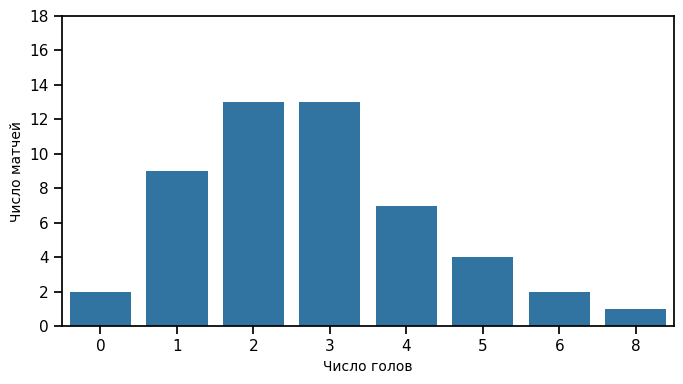

In [24]:
# 2.4.
fig, ax_1 = plt.subplots(1, 1, figsize = (7, 4))
sns.countplot(data = matches, x = 'total_score')
plt.ylabel('Число матчей', fontsize = 10) # подпись на Оу 
plt.ylim(0, 18)
plt.xlabel('Число голов', fontsize = 10) # подпись на Ох 
plt.tight_layout()
plt.show()

Наиболее частый результат за матч: 2 и 3 забитых гола. Распределение похоже на нормальное

In [25]:
# 2.5. min
idx = matches['total_score'].min()
res = matches[matches['total_score'] == idx]
res = res['match_id'].values
for i in res:
    matchInfo(i)

England  -  Scotland ( 0  -  0 , Group Stage , Wembley Stadium ( England )
Spain  -  Sweden ( 0  -  0 , Group Stage , Estadio de La Cartuja ( Spain )


In [26]:
#2.5. max
idx1 = matches['total_score'].max()
res1 = matches[matches['total_score'] == idx1]
res1 = res1['match_id'].values
for i in res1:
    matchInfo(i)

Croatia  -  Spain ( 3  -  5 , Round of 16 , Parken ( Denmark )


In [27]:
def matchInfo1(match_id, team_id):
    listC = []
    data = matches.loc[matches['match_id'] == match_id, ['home_team_id', 'away_team_id', 'home_team_name', 'away_team_name', 'home_score', 'away_score', 'competition_stage_name', 'stadium_name', 'stadium_country',]]
    data1 = data.loc[data['home_team_id'] == team_id, ['home_team_name', 'away_team_name', 'home_score', 'away_score', 'competition_stage_name', 'stadium_name', 'stadium_country']]
    data2 = data.loc[data['away_team_id'] == team_id, ['home_team_name', 'away_team_name', 'home_score', 'away_score', 'competition_stage_name', 'stadium_name', 'stadium_country']]
    if not data1.empty:
        data1['team'] = data1['home_team_name']
        data1['subs'] = 2
        return data1
        #print(data1)
    else:
        data2['team'] = data2['away_team_name']
        data2['subs'] = 2
        return data2
        #print(data2)
    
    #dataf = pd.concat([data1, data2])
    #print(dataf)
    #data = data.squeeze()
    #data = data.values

In [28]:
matchInfo1(3795220, 914)

,home_team_name,away_team_name,home_score,away_score,competition_stage_name,stadium_name,stadium_country,team,subs
0,Italy,Spain,1,1,Semi-finals,Wembley Stadium,England,Italy,2


In [101]:
#2.6.
#lineups.iloc[:5, :4]
tmp = lineups.groupby(by = ['match_id', 'team_id'])['player_id'].nunique()
nes = tmp[tmp.values == 13]
nes1 = nes.index.get_level_values('match_id').values
nes2 = nes.index.get_level_values('team_id').values
#нужно вывести все названия команд, где метч между match_id и team_id
may = []
h = 0
for i in nes1:
    g = nes2[h]
    pup = matchInfo1(i, g)
    #dataf = pd.concat([data1, data2])
    may.append(pup)
    h += 1
maypd = pd.concat(may) #, ignore_index = True)
maypd
#print(maypd['home_team_name'] + ['away_team_name'])
#print(type(may))
    #print(f"Team: ", lineups[])

,home_team_name,away_team_name,home_score,away_score,competition_stage_name,stadium_name,stadium_country,team,subs
50,Wales,Switzerland,1,1,Group Stage,Bakı Olimpiya Stadionu,Azerbaijan,Switzerland,2
50,Wales,Switzerland,1,1,Group Stage,Bakı Olimpiya Stadionu,Azerbaijan,Wales,2
37,Netherlands,Ukraine,3,2,Group Stage,Johan Cruijff Arena (Amsterdam),Netherlands,Ukraine,2
44,France,Germany,1,0,Group Stage,Allianz Arena,Germany,France,2
30,England,Scotland,0,0,Group Stage,Wembley Stadium,England,England,2
30,England,Scotland,0,0,Group Stage,Wembley Stadium,England,Scotland,2
17,England,Germany,2,0,Round of 16,Wembley Stadium,England,England,2
13,Ukraine,England,0,4,Quarter-finals,Estadio Olímpico,Italy,Ukraine,2


In [102]:
#2.7.
#passes['outcome_id']
import math
pi = math.pi
temka = passes[['angle','outcome_id']]
quantity = passes.shape
quantity = quantity[0]
temka1 = temka.loc[temka['outcome_id'].isnull(), ['angle']]
shares = temka1.shape
shares = shares[0]
share = shares/quantity
share = round(share, 3)
print(f"Доля точных передач:", share)
acrossplus = temka.loc[(temka['angle'] > (pi/4)) & (temka['angle'] < (3*pi/4)), ['angle', 'outcome_id']]
shareacross = acrossplus.loc[acrossplus['outcome_id'].isnull(), ['angle']]
shareacross = shareacross.shape
shareacross = shareacross[0]
acrossplus = acrossplus.shape
acrossplus = acrossplus[0]
acrossminus = temka.loc[(temka['angle'] > (-3*pi/4)) & (temka['angle'] < (-pi/4)), ['angle', 'outcome_id']]
shareacross1 = acrossminus.loc[acrossminus['outcome_id'].isnull(), ['angle']]
shareacross1 = shareacross1.shape
shareacross1 = shareacross1[0]
acrossminus = acrossminus.shape
acrossminus = acrossminus[0]
acrossr = (shareacross + shareacross1)/(acrossplus + acrossminus)
forward = temka.loc[(temka['angle'] > (-pi/4)) & (temka['angle'] < (pi/4)), ['angle', 'outcome_id']]
shareforward = forward.loc[forward['outcome_id'].isnull(), ['angle']]
shareforward = shareforward.shape
shareforward = shareforward[0]
forward = forward.shape
forward = forward[0]
forwardr = shareforward/forward
backward = temka.loc[(temka['angle'] < (-3*pi/4)) | (temka['angle'] > (3*pi/4)), ['angle', 'outcome_id']]
sharebackward = backward.loc[backward['outcome_id'].isnull(), ['angle']]
sharebackward = sharebackward.shape
sharebackward = sharebackward[0]
backward = backward.shape
backward = backward[0]
backwardr = sharebackward/backward
vivod = pd.Series([acrossr, backwardr, forwardr], index = ['across', 'backward', 'forward'])
print(vivod)

Доля точных передач: 0.835
across      0.884
backward    0.967
forward     0.676
dtype: float64


Наибольшая доля точных передач среди передач назад => они наиболее успешные. Наименее успешные - передачи вперед.

In [31]:
#2.8.

country_accuracy = {"Country": [], "Accuracy": []} # создаем словарь
for country in passes["team_name"].unique(): # для каждой уникальной страны в датафрейме passes 
    country_table = passes[passes["team_name"] == country] # создаем новый датафрейм, в кот строки совпадают с country
    country_accuracy["Country"].append(country) # Добавляем в словарь country
    country_accuracy["Accuracy"].append(len(country_table[country_table["outcome_name"].isna()])/len(country_table)) # Добавляю в словарь точность стран.
country_accuracy = pd.DataFrame(country_accuracy) # Превращаю словарь в датафрейм

In [32]:
# команды с самой высокой точностью передач
country_accuracy.sort_values("Accuracy", ascending = False).head() # Здесь сортируем страны по точности в порядке убывания, выводим топ-5

,Country,Accuracy
0,Spain,0.888
7,Germany,0.879
8,Portugal,0.874
9,France,0.874
1,Italy,0.867


In [33]:
# команды с самой низкой точностью передач
country_accuracy.sort_values("Accuracy").head() # аналогично, но сортировка в порядке возрастания

,Country,Accuracy
5,Sweden,0.756
21,Hungary,0.759
13,Czech Republic,0.760
12,Poland,0.765
2,Russia,0.766


Лидер по точным передачам - Испания, антилидер - Швеция, недалеко от нее ушла и Россия (впрочем, кто бы сомневался)))

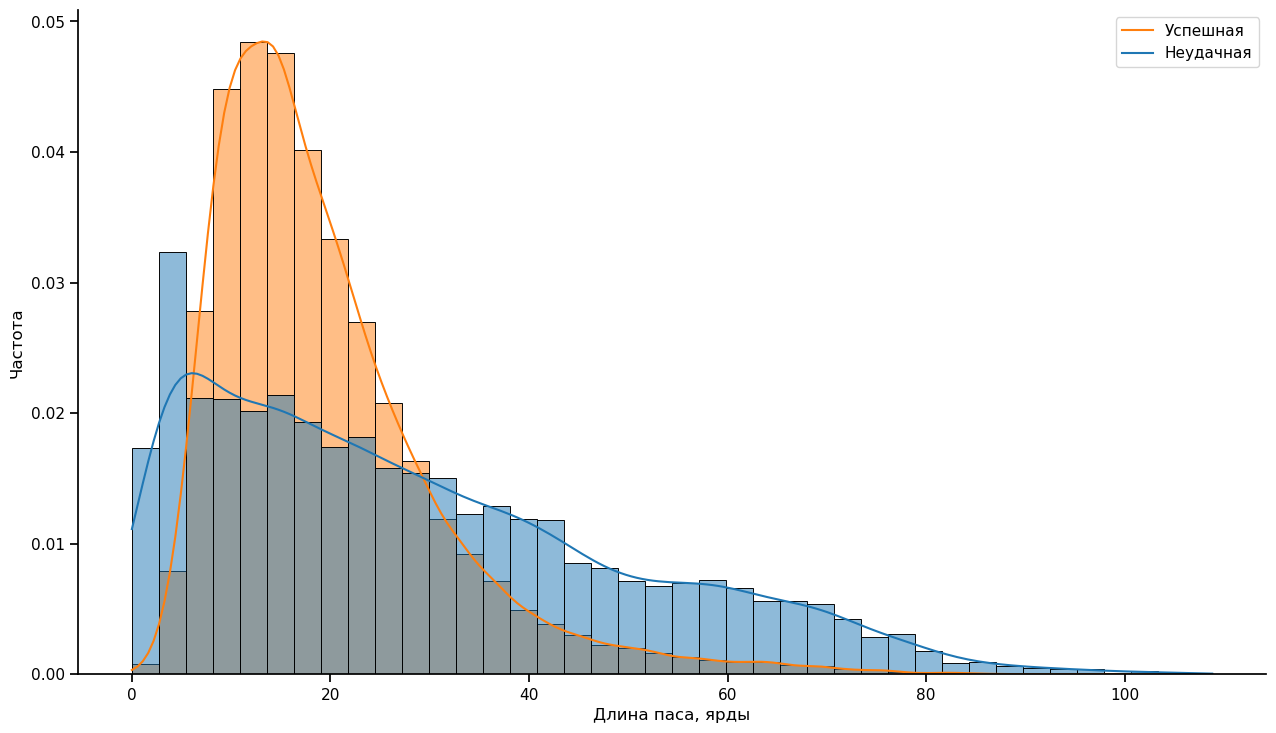

In [50]:
# 2.9.
import seaborn as sb
passes_accuracy = passes
passes_accuracy["boolean_outcome"] = passes_accuracy["outcome_name"].isna() # создаем новый столбец, где True, если передача точная
length_hist = sb.displot(passes_accuracy, x = "length", hue = "boolean_outcome", kde = True, stat = "density", bins = 40, common_norm = False, legend = False).set(xlabel = "Длина паса, ярды", ylabel = "Частота")
# Сначала передаём гистограмме сам датасет, далее: по оси x отложена длина, hue: делаем разные графики для разных значений данного столбца
# kde рисует линии, stat - даёт частоту вместо просто количества (количество точных передач очень велико в районе длины 20, из-за чего график становится плохо читаемым), common_norm говорит о том, что нормализовывать графики надо раздельно (то есть значение каждого бина делится не на
# сумму всех передач, а только на сумму передач даннного типа: точные или неточные), bins задает ширину столбцов
length_hist.fig.set_figwidth(15)
length_hist.fig.set_figheight(8)
plt.legend(loc = 'best', labels = ["Успешная", "Неудачная"])
plt.show()

Чем длинее пас в среднем, тем больше передача обречена на неуспех. И обратное тоже справедливо

In [36]:
# 2.10.
mean_passes = {"Country": [], "Mean number of accurate passes": []} # аналогично 8 пункту
for country in passes_accuracy["team_name"].unique():
    country_table = passes_accuracy[passes_accuracy["team_name"] == country]
    accurate_passes = []
    for match in country_table["match_id"].unique(): # Проходимся циклом по каждому матчу
        accurate_passes.append(len(country_table[(country_table["match_id"] == match) & (country_table["boolean_outcome"])])) # Здесь строится таблица, в которой есть только успешные передачи данного
                                                                                                                              # матча. Их число приписывается в список
    mean_passes["Country"].append(country)
    mean_passes["Mean number of accurate passes"].append(np.mean(accurate_passes)) # Здесь берём среднее от списка и добавляем его в (будущий) датафрейм
mean_passes = pd.DataFrame(mean_passes)
mean_passes = mean_passes.sort_values(by = 'Country') # сортируем страны по алфавиту
mean_passes

,Country,Mean number of accurate passes
15,Austria,472.750
20,Belgium,524.000
14,Croatia,442.000
13,Czech Republic,335.800
3,Denmark,430.167
18,England,483.000
23,Finland,309.333
9,France,533.000
7,Germany,586.750
21,Hungary,240.000


In [43]:
#2.11.
home_country_goals = matches[["home_team_name", "home_score"]] # Берём стран-хозяев и их голы
home_country_goals.columns = ["team_name", "score"]
#home_country_goals
away_country_goals = matches[["away_team_name", "away_score"]] # Берём стран-гостей и их голы
away_country_goals.columns = ["team_name", "score"]
#away_country_goals
country_goals = pd.concat([home_country_goals, away_country_goals]) # объединяем предыдущие две таблицы
#country_goals
goals_mean = country_goals.pivot_table("score", "team_name") # Вычисляем среднее значение голов для каждой страны, создаем для этого новый датафрейм
goals_mean.head()



,score
team_name,
Austria,1.250
Belgium,1.800
Croatia,1.750
Czech Republic,1.200
Denmark,2.000


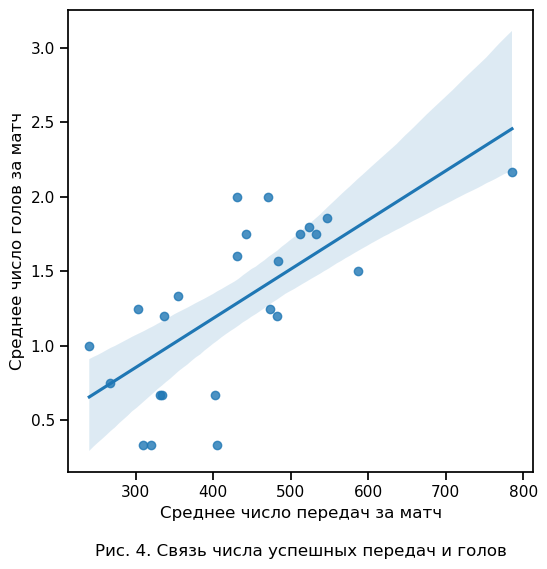

In [54]:
# 2.12.
mean_passes = mean_passes.sort_values("Country") # Сортирую таблицу, чтобы данные по странам шли в одинаковом порядке
#mean_passes
plt.figure(figsize = (6, 6))
plt.title('Рис. 4. Связь числа успешных передач и голов', y = -0.2) # название графика
sb.regplot(x = mean_passes["Mean number of accurate passes"], y = goals_mean).set(xlabel = "Среднее число передач за матч", ylabel = "Среднее число голов за матч")
plt.show() #  в функцию, которая строит график, заносим, что ставим по х, а что по у

Связь не слишком явная, хотя общую тенденцию проследить вроде бы можно. Однако для более точных выводов следует проводить дальнейший регрессионный анализ.

C:\Users\admin\AppData\Local\Temp\ipykernel_844\982979197.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if coord[1] < 36:
C:\Users\admin\AppData\Local\Temp\ipykernel_844\982979197.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return(np.sqrt((120 - coord[0])**2 + (36 - coord[1])**2))
C:\Users\admin\AppData\Local\Temp\ipykernel_844\982979197.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (coord[1] >= 36) and (coo

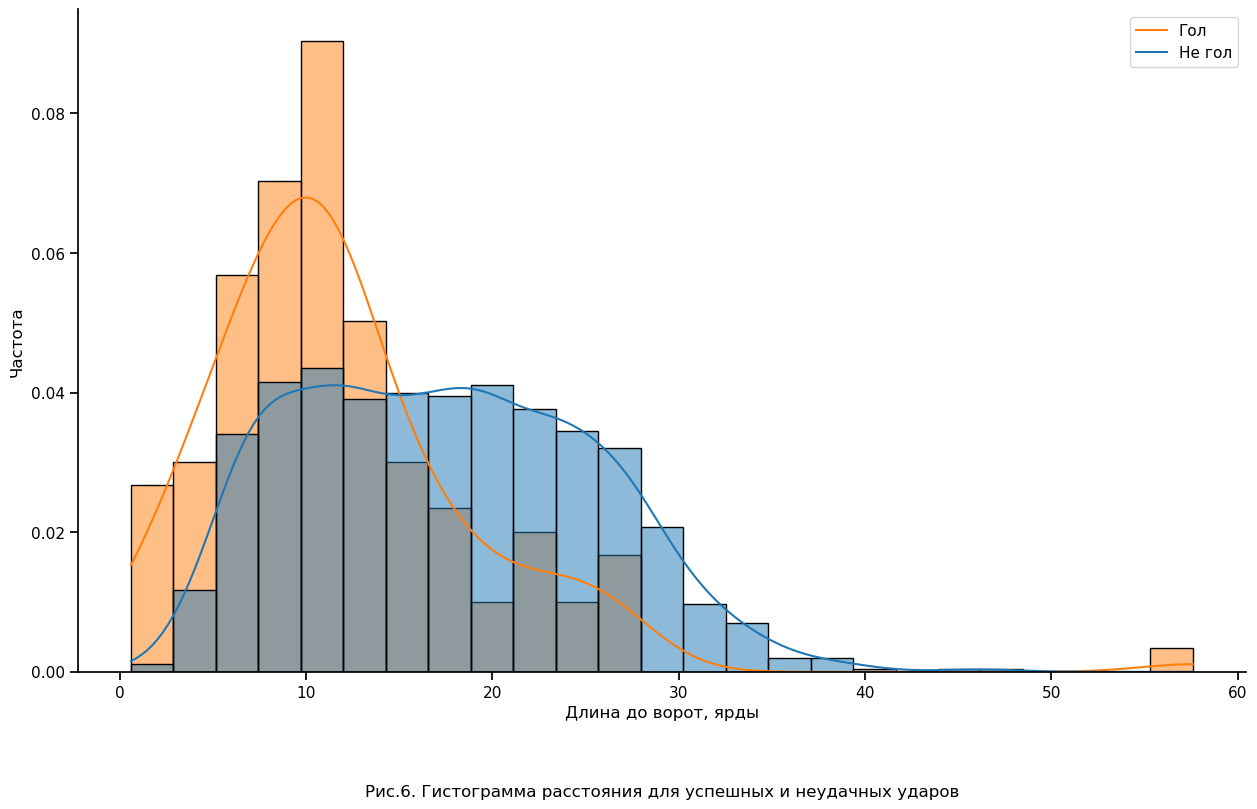

In [63]:
#2.13.
shots_no_5 = shots[shots["period"] != 5] # Отсекаем удары послематчевых пенальти
#shots_no_5
def shot_distance_count(coord): # Делаем функцию для подсчёта расстояния, которая по сути дана в условии
    if coord[1] < 36:
        return(np.sqrt((120 - coord[0])**2 + (36 - coord[1])**2))
    elif (coord[1] >= 36) and (coord[1] <= 44):
        return(120 - coord[0])
    else:
        return(np.sqrt((120 - coord[0])**2 + (coord[1] - 44)**2))
shots_no_5["shot_distance"] = shots_no_5[["location_x", "location_y"]].apply(shot_distance_count, 1) # Делаем новый столбец расстояний из результатов применения функцции
#shots_no_5
shots_no_5["boolean_outcome"] = shots_no_5["outcome_name"] == "Goal" # Тут я делаю колонку, чтобы можно было легко отделять голы от не голов, чтобы просто подставлять таблицу в функцию для построения гистограмм
shots_no_5[shots_no_5["boolean_outcome"]]
shot_hist = sb.displot(shots_no_5, x = "shot_distance", hue = "boolean_outcome", kde = True, stat = "density", common_norm = False, legend = False).set(xlabel = "Длина до ворот, ярды", \
ylabel = "Частота") # Здесь всё аналогично 9 пункту
shot_hist.fig.set_figwidth(15)
shot_hist.fig.set_figheight(8)
plt.legend(labels = ["Гол", "Не гол"])
plt.title('Рис.6. Гистограмма расстояния для успешных и неудачных ударов', y=-0.2)
plt.show()

In [64]:
shots_no_5[shots_no_5["boolean_outcome"]].sort_values("shot_distance", ascending = False).head(1) # Ищем тот самый самый гол с самого большого расстояния

,match_id,index,id,period,minute,second,location_x,location_y,team_id,team_name,player_id,player_name,end_location_x,end_location_y,end_location_z,key_pass_id,outcome_id,outcome_name,shot_distance,boolean_outcome
1129,3788748,1987,26ef739f-b65a-4993-936e-8717cf0cd7e7,2,51,31,63.400,25.300,912,Czech Republic,7044,Patrik Schick,120.000,38.400,1.700,NaN,97,Goal,57.603,True


**Гол с огромного расстояния до ворот - это гол Патрика Шика, играющего за Чехию, в ворота Шотландии, который был забит практически с центра поля из-за того, что вратарь Шотландии вышел из ворот и не успел вовремя вернуться** <br>
https://youtu.be/O4A8roywiNk?si=8Ko0zWyRyq0tnkIA

In [66]:
# 2.14.
matches_shots = {"Match": [], "Shots": []}
for match in shots_no_5["match_id"].unique(): # Ведём итерацию по всем матчам
    matches_shots["Match"].append(match) # На каждом шаге итерации добавляем матч в новый словарь
    matches_shots["Shots"].append(len(shots_no_5[shots_no_5["match_id"] == match])) # А также добавляем общее число ударов, нанесённых в этом матче
matches_shots = pd.DataFrame(matches_shots)
best_match = matches_shots.sort_values("Shots", ascending = False).iloc[0, 0]
matches_shots[matches_shots["Match"] == best_match] # Ищем топ-1 матч по нанесённым ударам

,Match,Shots
28,3788765,43


In [68]:
matches[matches["match_id"] == best_match] # В таблице матчей ищем матч с данным id, чтобы понять, кто там с кем играл

,match_id,match_date,kick_off,competition_stage_id,competition_stage_name,home_team_id,home_team_name,home_team_group,away_team_id,away_team_name,away_team_group,stadium_id,stadium_name,stadium_country,referee_id,referee_name,home_score,away_score,total_score
28,3788765,2021-06-20,18:00:00.000,10,Group Stage,773,Switzerland,Group A,909,Turkey,Group A,4549,Bakı Olimpiya Stadionu,Azerbaijan,943,Slavko Vinčić,3,1,4


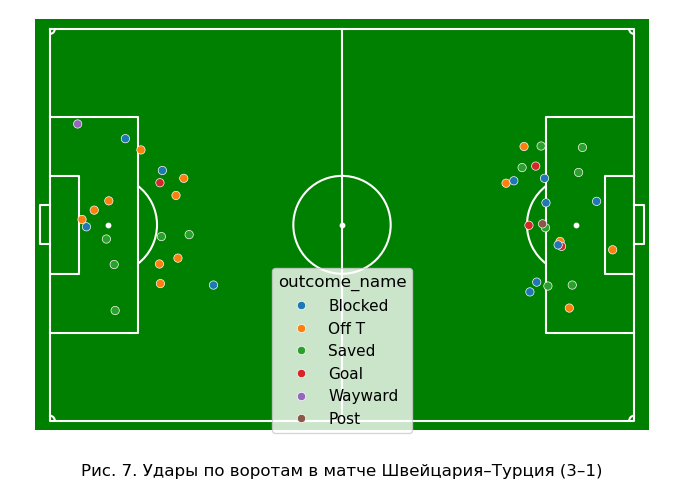

In [104]:
# 2.15.
from pitch import plotPitch
best_match_table = shots_no_5[shots_no_5["match_id"] == best_match].copy() # Создаём новую таблицу только с ударами из нужного матча
#best_match_table
def away_team_change(array): # Создаём функцию, которая нам преобразует координаты для команды-гостя, чтобы на диаграмме обе команды не били в одни и те же ворота
    if array["team_name"] == "Turkey":
        return((120 - array["location_x"]), (80 - array["location_y"]))
    else:
        return(array["location_x"], array["location_y"])
    
best_match_table[["location_x", "location_y"]] = best_match_table[["location_x", "location_y", "team_name"]].apply(away_team_change, 1, result_type = "expand")
#best_match_table # Здесь применяетяся функция, заданная выше. Параметры команды apply: сначала подаётся сама функция, затем 1 означает, что она будет применяться к рядам, а последний параметр говорит,
                 # что результат работы функции надо разбить по двум колонкам. Функция принимает на вход старые координаты и название страны. По названию страны она понимает, нужно ли координаты менять.
                 # После этого она выдаёт массив из двух новых координат, который разбивается по двум столбцам

plt.figure(figsize=(7, 5)) # Здесь за основу взяла пример из задания. Для начала надо положить файл с прогой, которую дали по условию, в ту же папку, где и данная программа лежит. Дальше я немного
plotPitch()                 # поменяла некоторые параметры, а именно изменила размер картинки, в функции plotpitch убрала параметр, который заставлял её рисовать координаты на поле, а также убрала команду
sb.scatterplot(best_match_table, x = "location_x", y = "location_y", hue = "outcome_name") # на то, чтобы сохранять это поле как картинку (ибо зачем мне на компе pdf картинки каких-то полей)
#plt.tight_layout(0.1) # Скаттерплот делает по сути так же, как и дисплот в более ранних пунктах. 
plt.title('Рис. 7. Удары по воротам в матче Швейцария–Турция (3–1)', y=-0.1)
plt.tight_layout()
plt.show()
plt.close() 